<a href="https://colab.research.google.com/github/Satvik256/TestRepo/blob/master/simpson_data_set(0.9954).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [30]:
!pip install "torch==1.4" "torchvision==0.5.0"

     |████████████████████████████████| 753.4MB 21kB/s 
     |████████████████████████████████| 4.0MB 20.6MB/s 
  Found existing installation: torch 1.5.0+cu101
    Uninstalling torch-1.5.0+cu101:
      Successfully uninstalled torch-1.5.0+cu101
  Found existing installation: torchvision 0.6.0+cu101
    Uninstalling torchvision-0.6.0+cu101:
      Successfully uninstalled torchvision-0.6.0+cu101


In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *

In [0]:
from google.colab import files

In [5]:
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"satvikdixit","key":"226372b04620f0f5278956c3c3ae6af0"}'}

In [0]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

In [0]:
! chmod 600 ~/.kaggle/kaggle.json

In [8]:
!kaggle datasets download -d alexattia/the-simpsons-characters-dataset -p /content/data/

100% 1.07G/1.08G [00:52<00:00, 62.9MB/s]
100% 1.08G/1.08G [00:52<00:00, 21.9MB/s]


In [10]:
!unzip /content/data/simpson.zip

Streaming output truncated to the last 5000 lines.
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1271.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1272.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1273.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1274.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1275.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1276.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1277.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1278.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1279.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1280.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1281.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1282.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pi

In [0]:
!mv /content/simpsons_dataset/ /content/data/

In [0]:
path=Path('/content/data/simpson')

In [0]:
lst=get_image_files(path/'bart_simpson')

In [8]:
lst[:5]

[PosixPath('/content/data/simpson/bart_simpson/pic_0162.jpg'),
 PosixPath('/content/data/simpson/bart_simpson/pic_0689.jpg'),
 PosixPath('/content/data/simpson/bart_simpson/pic_0503.jpg'),
 PosixPath('/content/data/simpson/bart_simpson/pic_0512.jpg'),
 PosixPath('/content/data/simpson/bart_simpson/pic_0393.jpg')]

In [0]:
img=open_image(lst[3])

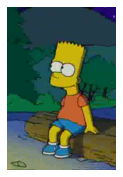

In [10]:
show_image(img)

In [11]:
img.shape[1:]

torch.Size([480, 320])

In [0]:
tfms = get_transforms(flip_vert=True, max_lighting=0.1, max_zoom=1.05, max_warp=0.)

In [0]:
np.random.seed(42)
data=ImageDataBunch.from_folder(path='/content/data/simpson/',valid_pct=0.2,ds_tfms=get_transforms(do_flip=True),size=224,bs=64).normalize(imagenet_stats)

In [0]:
learn=cnn_learner(data,models.resnet34,metrics=[error_rate,accuracy])

In [18]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


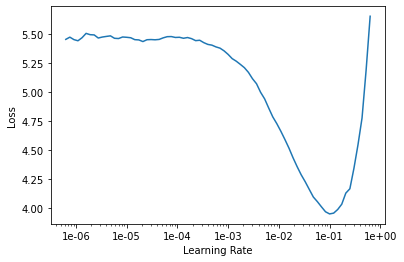

In [20]:
learn.recorder.plot()

In [21]:
learn.fit_one_cycle(10,slice(0.014142135623731))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.845138,0.434953,0.127433,0.872567,09:17
1,0.554949,0.260558,0.068076,0.931924,09:32
2,0.457877,0.248559,0.069629,0.930371,09:34
3,0.369239,0.183716,0.049206,0.950794,09:56
4,0.301204,0.139346,0.040129,0.959871,10:14
5,0.265744,0.116254,0.030336,0.969664,10:14
6,0.234643,0.095699,0.025081,0.974919,10:11
7,0.178710,0.080300,0.019945,0.980055,10:04
8,0.165595,0.066672,0.015048,0.984952,10:22
9,0.132909,0.066304,0.016004,0.983996,10:00


In [0]:
 learn.save('stage-1')

In [23]:
learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (33493 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
waylon_smithers,waylon_smithers,waylon_smithers,waylon_smithers,waylon_smithers
Path: /content/data/simpson;

Valid: LabelList (8373 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
lenny_leonard,bart_simpson,maggie_simpson,lisa_simpson,moe_szyslak
Path: /content/data/simpson;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1

In [0]:
learn.unfreeze()

epoch,train_loss,valid_loss,error_rate,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


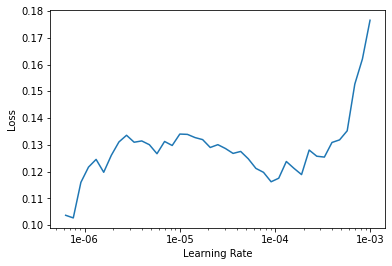

In [25]:
learn.lr_find()
learn.recorder.plot()

In [27]:
learn.fit_one_cycle(5,slice(1e-5,0.00141421356))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.063717,0.042691,0.010510,0.989490,10:43
1,0.073305,0.041602,0.010152,0.989848,10:42
2,0.051820,0.028451,0.007046,0.992954,10:37
3,0.029138,0.022631,0.004538,0.995462,10:33
4,0.021495,0.020281,0.004538,0.995462,10:36


In [0]:
learn.save('stage-2')

In [0]:
!mv /content/data/simpson/models /content/models

In [0]:
img=open_image(lst[79])

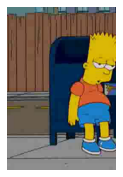

In [37]:
show_image(img)

In [41]:
x=img.shape
x[1],x[2]

(384, 256)

In [0]:
min_size=10000
for img in lst:
  tmp=open_image(img)
  x=tmp.shape
  min_size=min(min_size,x[1],x[2])

In [43]:
min_size

256

In [0]:
data_256=ImageDataBunch.from_folder(path='/content/data/simpson/',valid_pct=0.2,ds_tfms=get_transforms(do_flip=True),size=256,bs=64,seed=42).normalize(imagenet_stats)

In [52]:
learn.load('/content/models/models/stage-2')

Learner(data=ImageDataBunch;

Train: LabelList (33493 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
waylon_smithers,waylon_smithers,waylon_smithers,waylon_smithers,waylon_smithers
Path: /content/data/simpson;

Valid: LabelList (8373 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
lenny_leonard,bart_simpson,maggie_simpson,lisa_simpson,moe_szyslak
Path: /content/data/simpson;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1